This notebook peforms a blind tip reconstruction using the gradient decent of the erosion from the given surface and image data

## load required packages and test data

In [1]:
using Flux
using Plots
using BSON: @save, @load
using Revise, MDToolbox

In [2]:
@load "prepare_test_data.bson" width height resolution radius angle param models tip surfs images images_randn

## Define Flux layers

In [3]:
struct IErosion
    P::AbstractArray
end

IErosion(height::Integer, width::Integer) = IErosion(zeros(Float64, height, width))

Flux.@functor IErosion (P,)

(m::IErosion)(image) = ierosion(image, m.P)

## Blind-tip reconstruction from Image and Surface

In [4]:
m = IErosion(9, 9)

loss(image, surf) = Flux.Losses.mse(m(image), surf)
ps = Flux.params(m)

data = zip(images[1:100], surfs[1:100]);

In [5]:
sum(loss.(images[1:100], surfs[1:100]))

7521.51292068769

In [11]:
opt = ADAM(0.1)
#opt = RMSProp(0.1, 0.90)
#opt = Flux.Optimiser(ClipValue(0.0), ADAM(0.1))
#opt = Descent(0.1)

ADAM(0.1, (0.9, 0.999), IdDict{Any, Any}())

In [12]:
for epoch = 1:200
    Flux.train!(loss, ps, data, opt)
end

In [13]:
sum(loss.(images[1:100], surfs[1:100]))

516.7235739026968

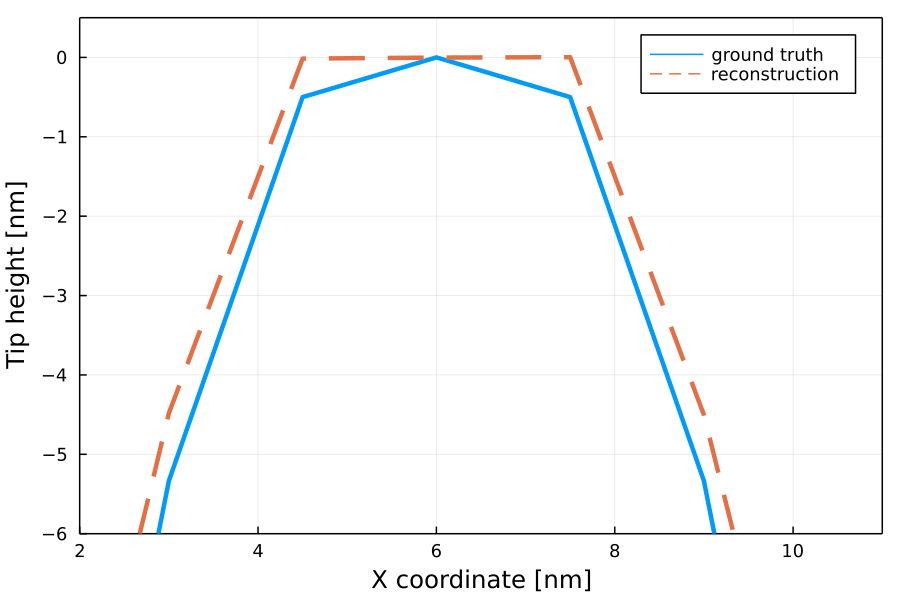

In [14]:
plot(collect(1:9) .* resolution / 10.0, tip[4, :] / 10.0, linewidth=3, label="ground truth")
p = plot!(collect(1:9) .* resolution / 10.0, m.P[4, :] / 10.0, linewidth=3, label="reconstruction", framestyle = :box, linestyle=:dash, dpi=150, fmt=:png)
ylims!((-6, 0.5))
xlims!((2, 11))
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Tip height [nm]", fontsize=35)

In [15]:
savefig(p, "blindtip_erosion01.png")

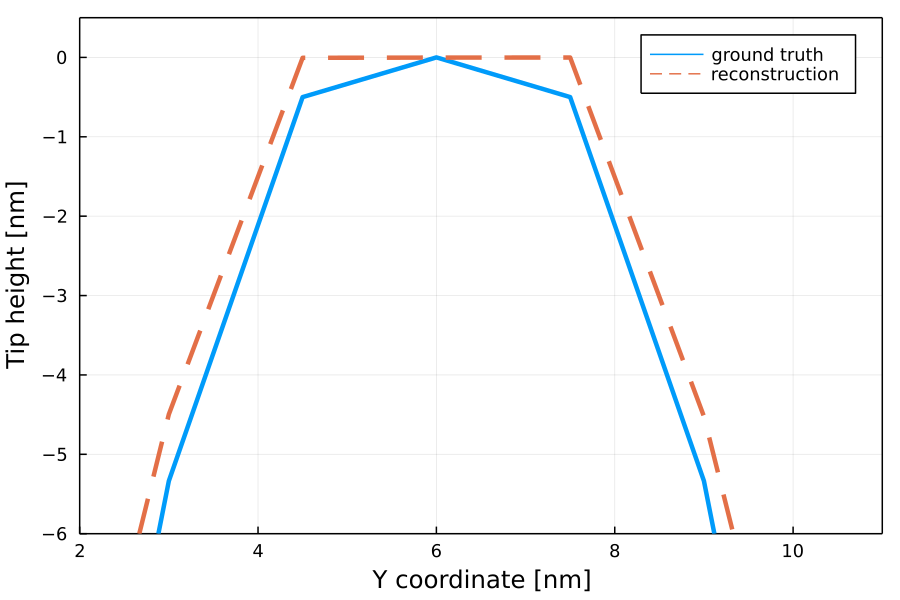

In [16]:
plot(collect(1:9) .* resolution / 10.0, tip[:, 4] / 10.0, linewidth=3, label="ground truth")
p = plot!(collect(1:9) .* resolution / 10.0, m.P[:, 4] / 10.0, linewidth=3, label="reconstruction", framestyle = :box, linestyle=:dash, dpi=150, fmt=:png)
ylims!((-6, 0.5))
xlims!((2, 11))
xlabel!("Y coordinate [nm]", fontsize=35)
ylabel!("Tip height [nm]", fontsize=35)

In [17]:
savefig(p, "blindtip_erosion02.png")

In [18]:
pyplot()

Plots.PyPlotBackend()

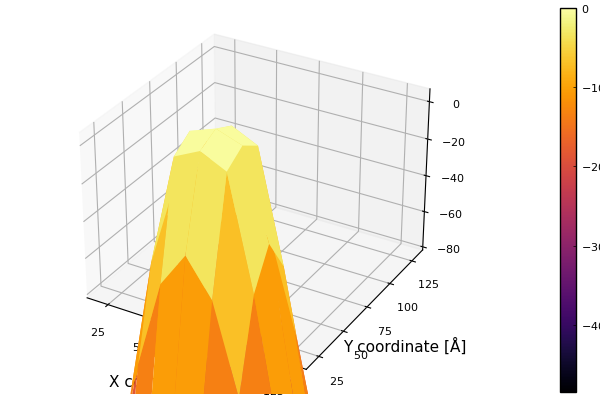

In [19]:
plot(collect(1:9) .* resolution, collect(1:9) .* resolution, tip, st=:surface)
zlims!((-80, 5))
xlabel!("X coordinate [Å]", fontsize=35)
ylabel!("Y coordinate [Å]", fontsize=35)
#zlabel!("Tip height [Å]", fontsize=35)

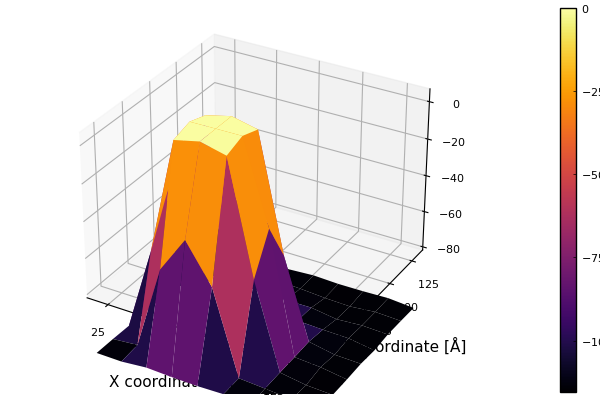

In [20]:
plot(collect(1:9) .* resolution, collect(1:9) .* resolution, m.P, st=:surface)
zlims!((-80, 5))
xlabel!("X coordinate [Å]", fontsize=35)
ylabel!("Y coordinate [Å]", fontsize=35)
#zlabel!("Tip height [Å]", fontsize=35)

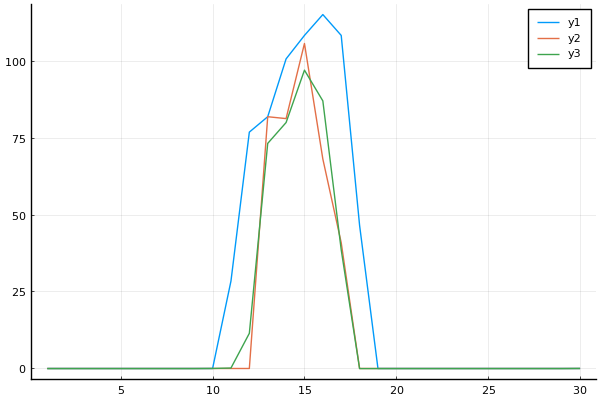

In [27]:
plot(images[1][15, :])
plot!(surfs[1][15, :])
plot!(ierosion(images[1],m.P)[15, :])

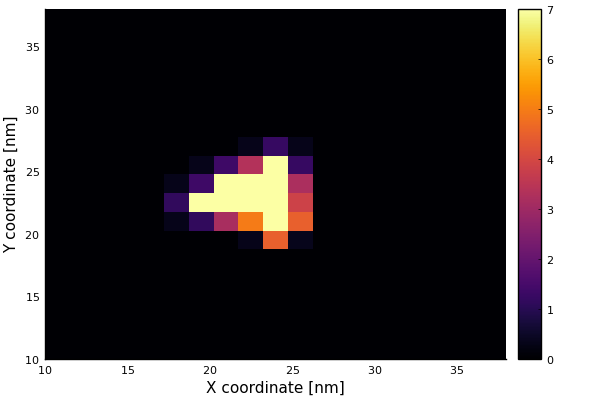

In [28]:
heatmap(collect(1:30) .* resolution / 10.0, collect(1:30) .* resolution / 10.0, ierosion(images[1],m.P) / 10.0, clim=(0, 7))
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Y coordinate [nm]", fontsize=35)
xlims!(10, 38)
ylims!(10, 38)

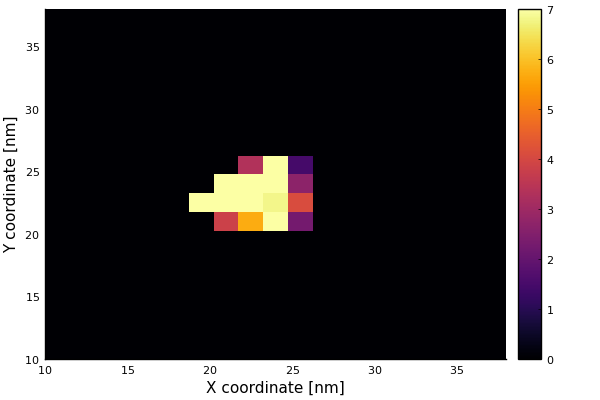

In [29]:
heatmap(collect(1:30) .* resolution / 10.0, collect(1:30) .* resolution / 10.0, surfs[1] / 10.0, clim=(0, 7))
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Y coordinate [nm]", fontsize=35)
xlims!(10, 38)
ylims!(10, 38)